Projeto de Análise Exploratória de Dados

1.   Base de dados fictícia sobre desempenho acadêmico em matemática, leitura e escrita.


Objetivo: Explorar e visualizar os dados para entender o desempenho acadêmico dos estudantes em matemática e língua portuguesa, identificando padrões e insights relevantes.

Jhecy Ketlin





In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importando dados

base_dados = pd.read_csv("StudentsPerformance+(1).csv")

In [3]:
# dimensão (linhas e colunas)

base_dados.shape

(1000, 8)

In [81]:
# mostra lista de atributos e métodos de um objeto
#dir(base_dados)

In [ ]:
#nome das colunas

base_dados.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
# 5 primeiras linhas

base_dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# tipos de cada coluna

base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
#somar qtd de nulos

base_dados.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
# renomeando as colunas

base_dados.rename(columns = {"gender" : "genero",
                             "race/ethnicity" : "raça/etnia",
                             "parental level of education" : "nivel de educaçao dos pais",
                             "lunch" : "almoço",
                             "test preparation course" : "curso preparatório",
                             "math score" : "nota matematica",
                             "reading score" : "nota leitura",
                             "writing score" : "nota escrita"}, inplace = True)

In [ ]:
base_dados.head()

,genero,raça/etnia,nivel de educaçao dos pais,almoço,curso preparatório,nota matematica,nota leitura,nota escrita
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Usando o .rename(columns = {}) renomea-se os nomes conforme expressado no código.

Usando o .columns() = [] renomea-se os nomes seguindo a ordem das colunas.

inplace = True, substitui os valores no df original

In [ ]:
# substituir os atritutos das colunas

base_dados["genero"] = base_dados["genero"].replace({"female": "feminino",
                                                     "male" : "masculino"})

base_dados["nivel de educaçao dos pais"] = base_dados["nivel de educaçao dos pais"].replace({"bachelor's degree" : "graduaçao",
                                                                                             "some college" : "superior incompleto",
                                                                                             "some high school" : "ensino medio incompleto",
                                                                                             "master's degree" : "mestrado",
                                                                                             "associate's degree" : "ensino tecnico",
                                                                                             "high school" : "ensino medio completo"})

base_dados["almoço"] = base_dados["almoço"].replace({"standard" : "padrao",
                                                     "free/reduced" : "reduzido"})

base_dados["curso preparatório"] = base_dados["curso preparatório"].replace({"none" : "nao",
                                                                             "completed" : "sim"})

In [ ]:
# 5 primeiras linhas

base_dados.head()

,genero,raça/etnia,nivel de educaçao dos pais,almoço,curso preparatório,nota matematica,nota leitura,nota escrita
0,feminino,group B,graduaçao,padrao,nao,72,72,74
1,feminino,group C,ensino medio incompleto,padrao,concluido,69,90,88
2,feminino,group B,mestrado,padrao,nao,90,95,93
3,masculino,group A,ensino tecnico,reduzido,nao,47,57,44
4,masculino,group C,ensino medio incompleto,padrao,nao,76,78,75


In [ ]:
# estatistica descritiva: medidas resumo

base_dados.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# valores unicos

base_dados.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [8]:
# soma de valores duplicados

base_dados.duplicated().sum()

0

In [ ]:
# proporção (%)

base_dados["genero"].value_counts(normalize = True)*100

,proportion
genero,
feminino,51.8
masculino,48.2


value_counts() : valor absoluto (518)

value_counts(normalize = True) : valor percentual (0.518)

In [49]:
 # grau de escolaridade dos pais

 educacao_pais = base_dados["parental level of education"].value_counts(normalize = True)*100

 educacao_pais

,proportion
parental level of education,
some college,22.6
associate's degree,22.2
high school,19.6
some high school,17.9
bachelor's degree,11.8
master's degree,5.9


<BarContainer object of 6 artists>

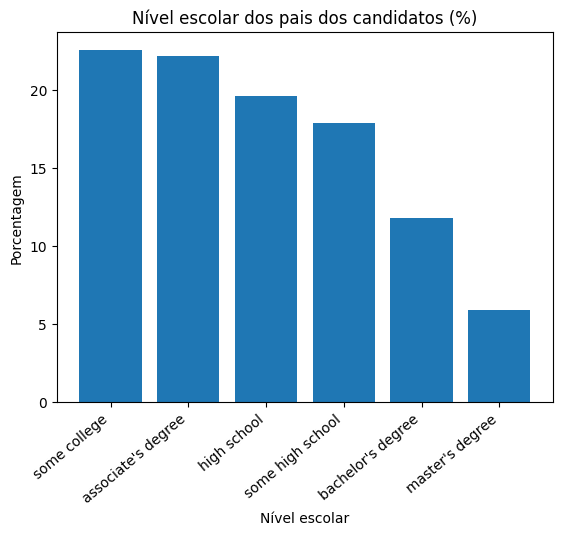

In [69]:
# contagem_educacao_pais =  base_dados["parental level of education"].value_counts()

x = educacao_pais.index
y = educacao_pais.values

plt.title("Nível escolar dos pais dos candidatos (%)")
plt.xlabel("Nível escolar")
plt.xticks(rotation = 40, ha = "right")
plt.ylabel("Porcentagem")
plt.bar(x, y)


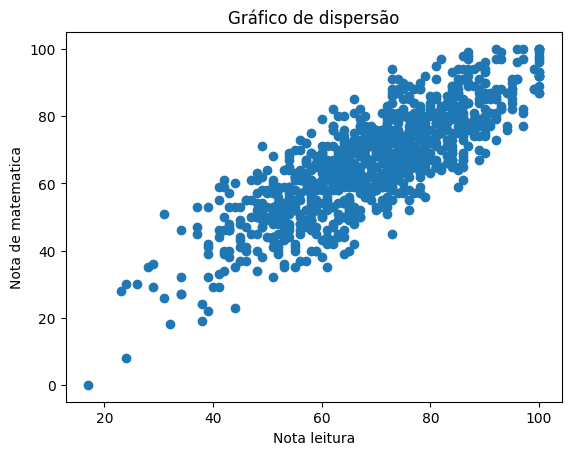

In [ ]:
# relação entre nota de leitura e matematica

x = base_dados["nota leitura"]
y = base_dados["nota matematica"]

plt.title("Gráfico de dispersão")
plt.xlabel("Gênero")
plt.ylabel("Nota de matematica")
plt.scatter(x,y)
plt.show()

In [17]:
# filtrando os candidatos com nota 100 em matematica

nota_100 = base_dados[base_dados["math score"] == 100]

nota_100

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


In [51]:
# contagem de notas 100 por genero

contagem_genero = nota_100["gender"].value_counts()

contagem_genero

,count
gender,
male,4
female,3


<BarContainer object of 2 artists>

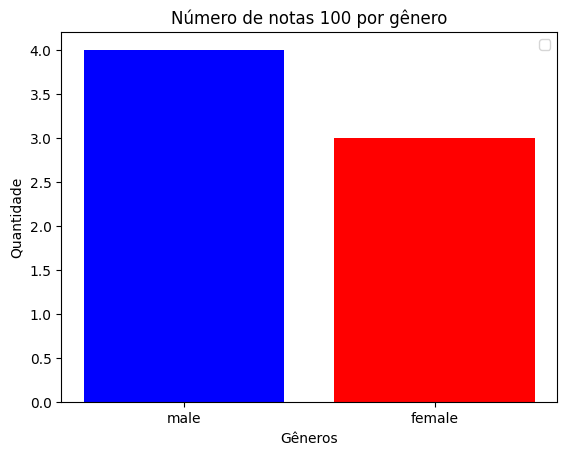

In [37]:
# grafico com numero de notas 100 por genero

x = contagem_genero.index # retorna os index dos elementos
y = contagem_genero.values # retorna os valores dos dados sem o rótulo

plt.title("Número de notas 100 por gênero")
plt.xlabel("Gêneros")
plt.ylabel("Quantidade")
plt.legend(loc = "best")

plt.bar(x, y, color = ["blue", "red"])


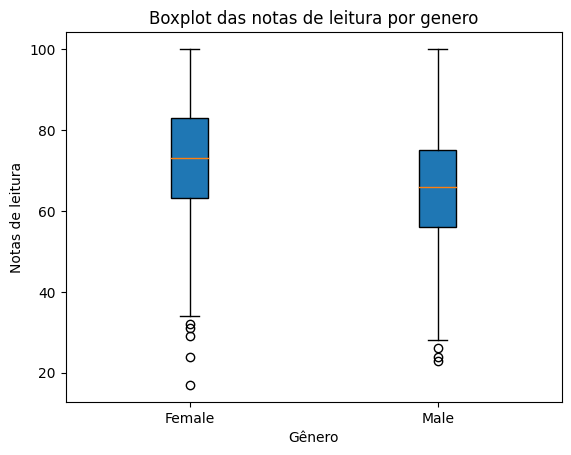

In [80]:
# Comparação entre as notas de leitura por genero

plt.boxplot([base_dados[base_dados["gender"] == "female"]["reading score"], # filtragem da nota de leitura do genero feminino
             base_dados[base_dados["gender"] == "male"] ["reading score"]], # filtragem da nota de leitura do genero masculino
            labels= ["Female", "Male"], # index de X
            patch_artist= True) # caixa preenchida
plt.title("Boxplot das notas de leitura por genero")
plt.xlabel("Gênero")
plt.ylabel("Notas de leitura")
plt.show()